##***AAXJ ETF Prediction with LSTM and ARIMA model***

###Group 18<br>
Abheeshek Gupta (UID:3035601621)<br>
Hsu, Ya Cheng (UID:3035550250)<br>


Installation of Necessary Libraries

In [0]:
#!pip3 install tensorflow==2.0.0

Introductory header files




In [0]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import numpy as np
import io
import matplotlib.pyplot as plt
import os
from subprocess import check_output as co
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
import tensorflow_datasets as tfds
# Check if any GPU is detected
print("Is GPU available: ", tf.test.is_gpu_available())
print("GPU(s) found: ")
print(tf.config.experimental.list_physical_devices('GPU'))

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
Is GPU available:  True
GPU(s) found: 
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [0]:
from google.colab import files
uploaded = files.upload()

Saving aaxj.us (1).csv to aaxj.us (1).csv


In [0]:
df_raw= pd.read_csv(io.StringIO(uploaded['aaxj.us (1).csv'].decode('utf-8')))
df_raw.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,2008-08-15,44.886,44.886,44.886,44.886,112,0
1,2008-08-18,44.564,44.564,43.875,43.875,28497,0
2,2008-08-19,43.283,43.283,43.283,43.283,112,0
3,2008-08-20,43.918,43.918,43.892,43.892,4468,0
4,2008-08-22,44.097,44.097,44.017,44.071,4006,0


In [0]:
df=df_raw.copy()
df.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,2008-08-15,44.886,44.886,44.886,44.886,112,0
1,2008-08-18,44.564,44.564,43.875,43.875,28497,0
2,2008-08-19,43.283,43.283,43.283,43.283,112,0
3,2008-08-20,43.918,43.918,43.892,43.892,4468,0
4,2008-08-22,44.097,44.097,44.017,44.071,4006,0


In [0]:
df = df.drop(['Volume','OpenInt'], axis=1)
df.head(22)

,Date,Open,High,Low,Close
0,2008-08-15,44.886,44.886,44.886,44.886
1,2008-08-18,44.564,44.564,43.875,43.875
2,2008-08-19,43.283,43.283,43.283,43.283
3,2008-08-20,43.918,43.918,43.892,43.892
4,2008-08-22,44.097,44.097,44.017,44.071
5,2008-08-25,44.044,44.044,43.248,43.248
6,2008-08-26,43.802,43.802,43.471,43.660
7,2008-08-27,44.564,44.564,44.457,44.457
8,2008-08-28,44.421,44.475,44.421,44.475
9,2008-08-29,44.224,44.224,44.171,44.171


In [0]:

df1=df.copy()
df1['Date']=pd.to_datetime(df1['Date'], format="%Y-%m-%d")
df1 = df1.set_index('Date')
li=[]
for i in range(4):
  for j in range(0,100,20):
    index=df1.iloc[j:2300:100,i].reset_index(drop=True) #reset_index to drop datetime index
    li.append(index)
data_df=pd.concat(li,axis=1,ignore_index=True)
data_df.columns = data_df.columns.astype(str)
print(data_df)
print(data_df.shape)


         0       1       2       3  ...      16      17      18      19
0   44.886  37.122  33.533  27.282  ...  36.039  29.646  26.414  29.576
1   29.154  29.592  26.718  31.877  ...  27.828  26.351  31.912  37.015
2   41.428  39.119  45.898  43.194  ...  39.477  46.202  43.213  46.810
3   48.442  49.578  49.309  48.621  ...  49.901  48.907  48.442  47.072
4   50.205  51.977  46.926  48.934  ...  51.771  47.143  48.566  47.707
5   49.174  51.934  55.971  58.631  ...  52.237  56.052  58.648  56.750
6   57.699  55.962  55.407  57.985  ...  55.952  54.493  58.083  57.250
7   57.225  55.047  56.876  48.818  ...  55.264  56.486  47.795  43.423
8   45.886  46.338  44.370  49.471  ...  46.021  43.860  49.536  52.593
9   52.712  51.243  48.230  46.780  ...  50.850  48.014  47.136  47.912
10  49.718  48.410  52.537  52.593  ...  49.082  52.722  52.785  53.458
11  56.501  55.965  54.896  54.362  ...  56.020  54.971  54.188  55.670
12  54.693  49.506  52.738  50.568  ...  49.848  53.015  50.708 

In [0]:
#train/test split
train_df=data_df[:21]
dev_df=data_df[1:22]
test_df=data_df[2:23]

In [0]:
print(train_df.head())
print(train_df.tail())
print(test_df.head())
print(test_df.tail())

        0       1       2       3  ...      16      17      18      19
0  44.886  37.122  33.533  27.282  ...  36.039  29.646  26.414  29.576
1  29.154  29.592  26.718  31.877  ...  27.828  26.351  31.912  37.015
2  41.428  39.119  45.898  43.194  ...  39.477  46.202  43.213  46.810
3  48.442  49.578  49.309  48.621  ...  49.901  48.907  48.442  47.072
4  50.205  51.977  46.926  48.934  ...  51.771  47.143  48.566  47.707

[5 rows x 20 columns]
         0       1       2       3  ...      16      17      18      19
16  58.344  60.868  61.279  60.276  ...  60.313  61.122  60.209  66.447
17  65.333  62.034  59.096  53.544  ...  62.044  58.969  53.554  52.995
18  54.448  53.660  51.898  48.258  ...  53.447  51.755  48.071  46.497
19  50.742  51.926  51.457  52.885  ...  51.545  51.153  52.905  54.257
20  57.082  57.899  59.337  59.297  ...  58.116  59.750  59.238  55.645

[5 rows x 20 columns]
        0       1       2       3  ...      16      17      18      19
2  41.428  39.119  45.898

In [0]:
print("Training Dataset:")
print(train_df.info())
print("------------------------")
print("Test Dataset:")
print(test_df.info())

Training Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       21 non-null     float64
 1   1       21 non-null     float64
 2   2       21 non-null     float64
 3   3       21 non-null     float64
 4   4       21 non-null     float64
 5   5       21 non-null     float64
 6   6       21 non-null     float64
 7   7       21 non-null     float64
 8   8       21 non-null     float64
 9   9       21 non-null     float64
 10  10      21 non-null     float64
 11  11      21 non-null     float64
 12  12      21 non-null     float64
 13  13      21 non-null     float64
 14  14      21 non-null     float64
 15  15      21 non-null     float64
 16  16      21 non-null     float64
 17  17      21 non-null     float64
 18  18      21 non-null     float64
 19  19      21 non-null     float64
dtypes: float64(20)
memory usage: 3.4 KB
None
-------------------

#ARIMA 

Reference: https://reurl.cc/b5VVW6

In this section, we tried to use ARIMA model to predict the ETF price by determining the parameters used in ARIMA, denoted by p, d, and q. To better explain the model, we need to know what p, q, and r is first. 

p: number of previous observations necessary to predict ETF at present time, which can be determined using the autocorrelation_plot and its intersection with the dotted upper boundary of the confident interval.

d: the order of differentiation (1 in general)

q: number of moving average jumps deployed to predict the current ETF, which can be determined by the pacf graph.

## Improvement for the next stage
From the prediction result, we can see that the model are not sensitive to dramatic turn that's unprecedented in the training dataset. For example, we can observe that there's a slight dip at the end of our training dataset, but the model fail to pick up on some picture and see it only as a periodical fluctuation. We believe such result is because of the lack of diversity in the training dataset, as well as the pre-processing methodology. We plan to enrich my dataset by taking inspiration from "Stock Price Correlation Coefficient Prediction with ARIMA-LSTM Hybrid Model" by Choi (2018) despite differences in dataset and prediction objectives. 


0


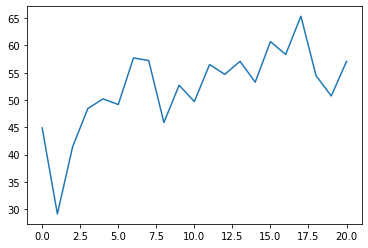

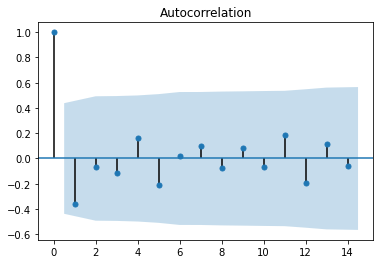

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


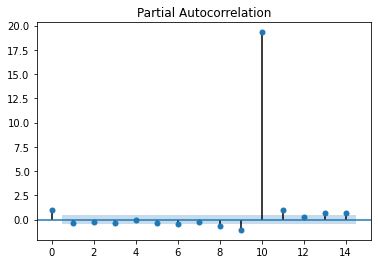

----------------------------------
1


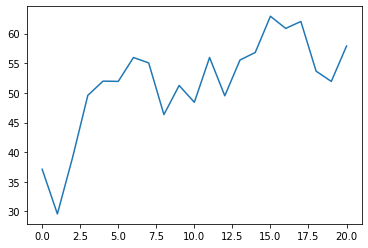

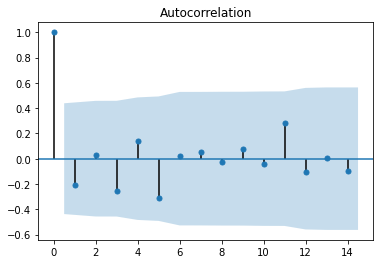

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


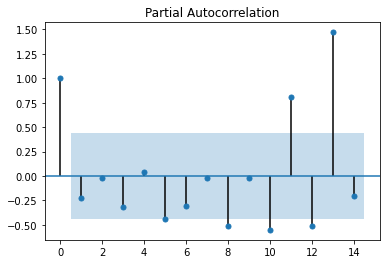

----------------------------------
2


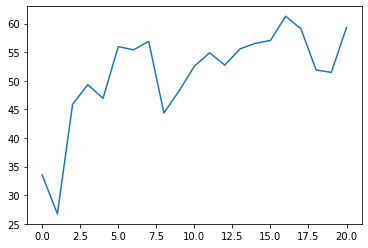

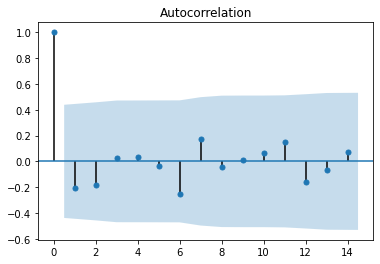

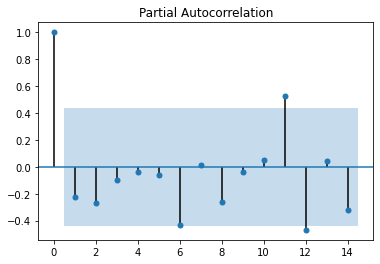

----------------------------------
3


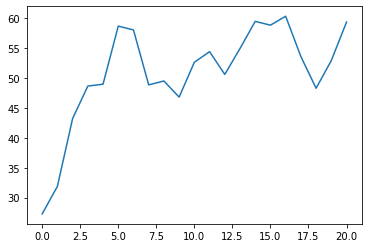

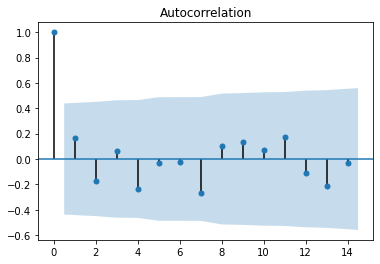

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


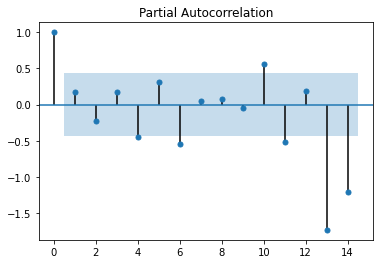

----------------------------------
4


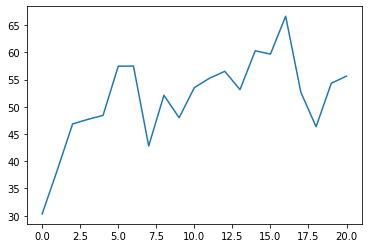

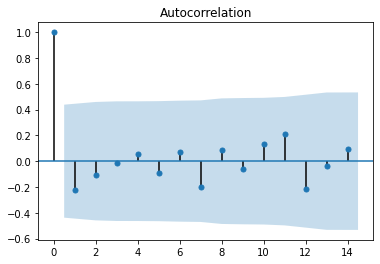

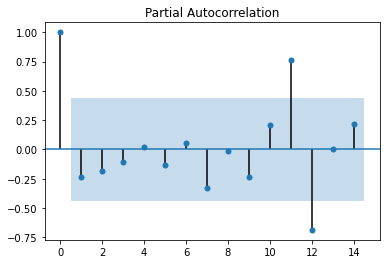

----------------------------------
5


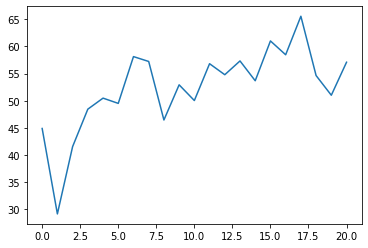

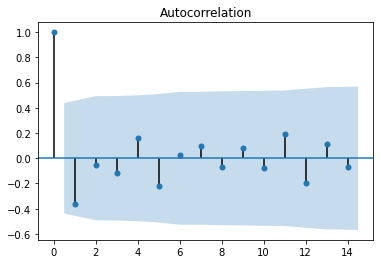

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


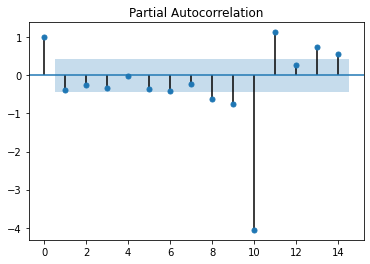

----------------------------------
6


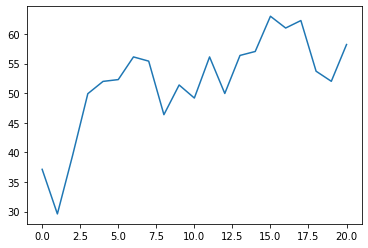

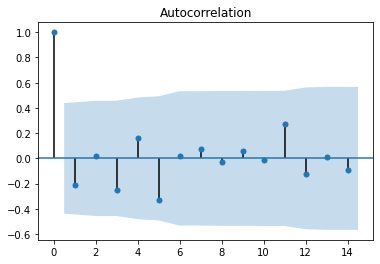

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


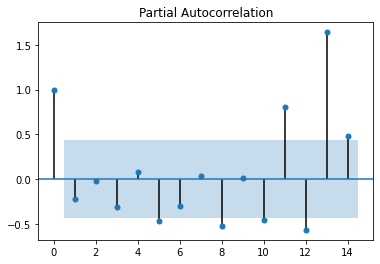

----------------------------------
7


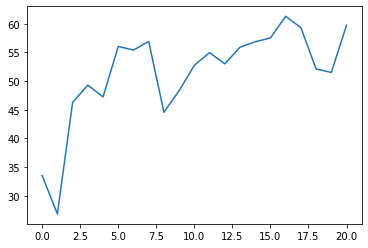

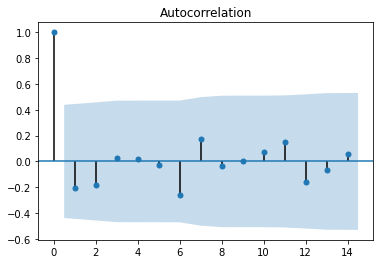

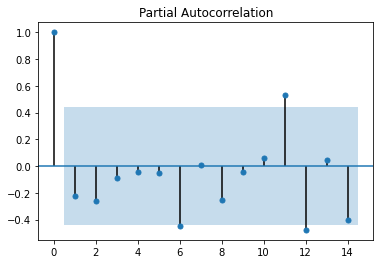

----------------------------------
8


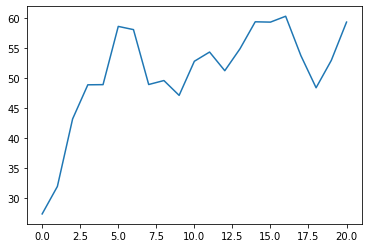

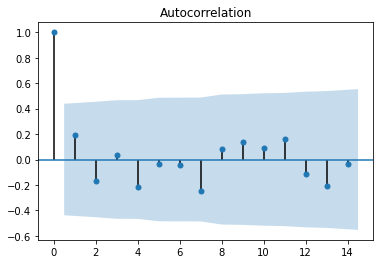

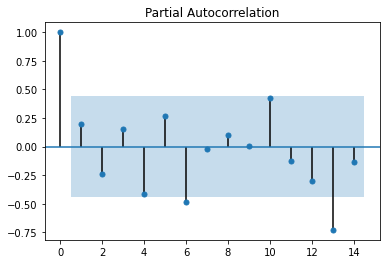

----------------------------------
9


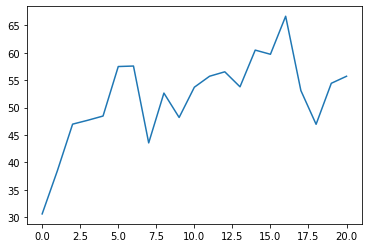

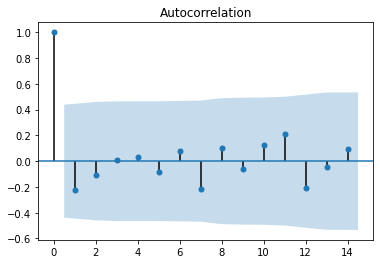

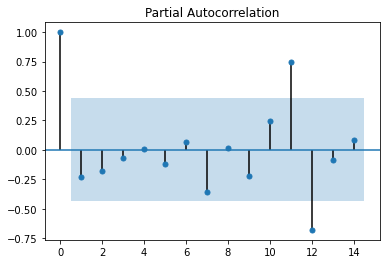

----------------------------------
10


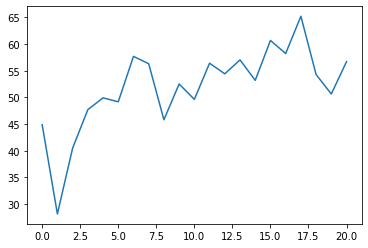

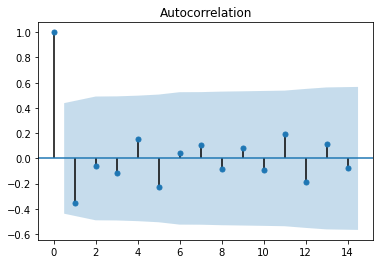

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


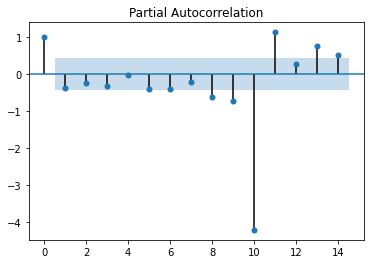

----------------------------------
11


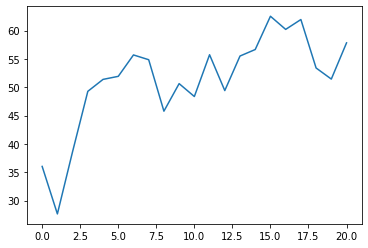

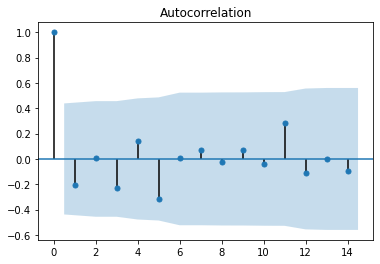

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


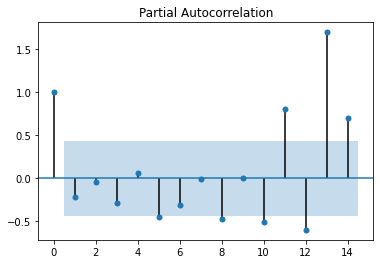

----------------------------------
12


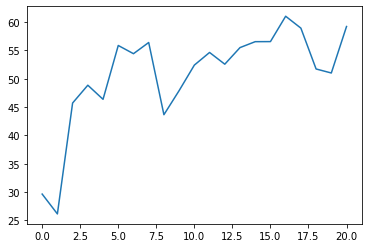

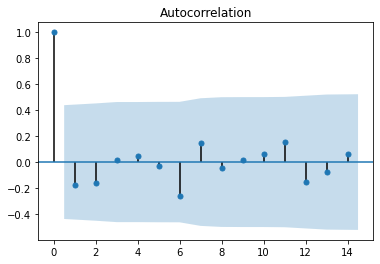

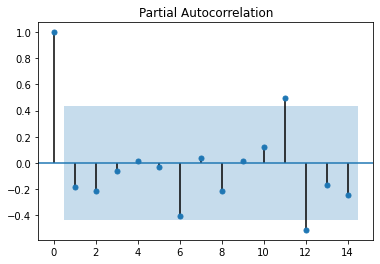

----------------------------------
13


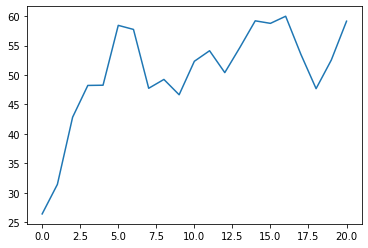

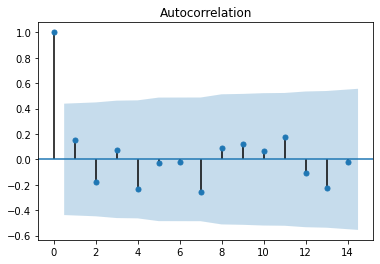

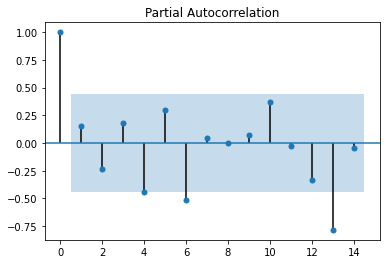

----------------------------------
14


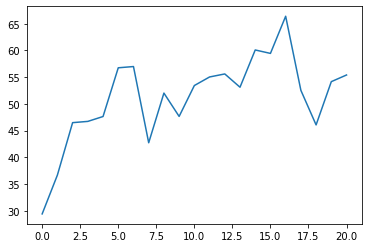

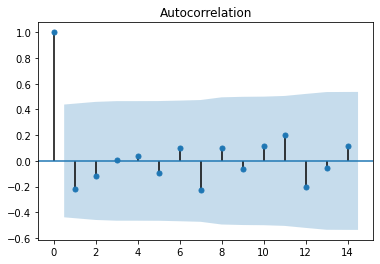

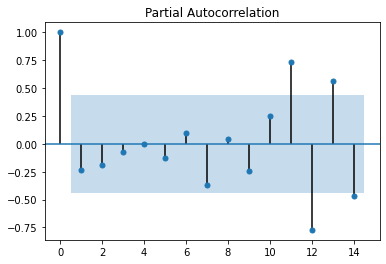

----------------------------------
15


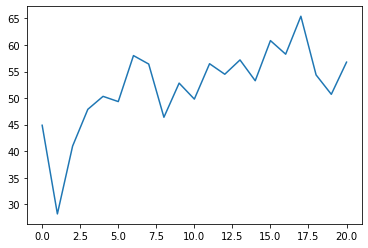

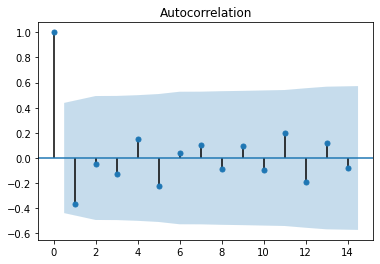

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


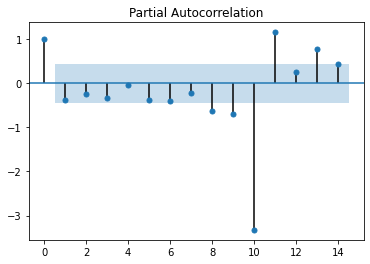

----------------------------------
16


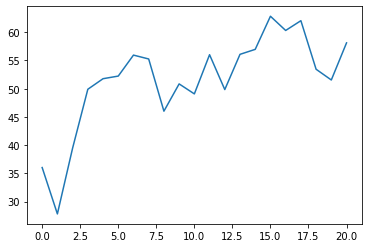

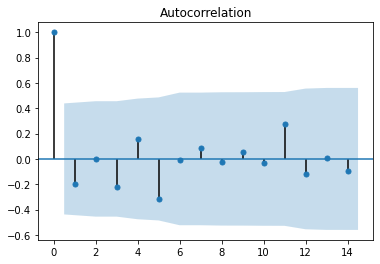

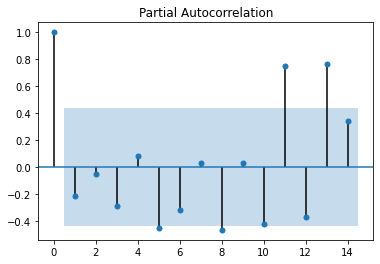

----------------------------------
17


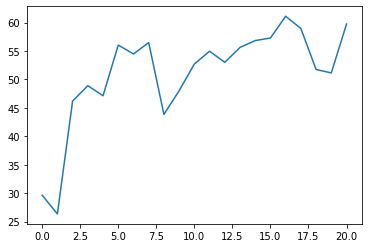

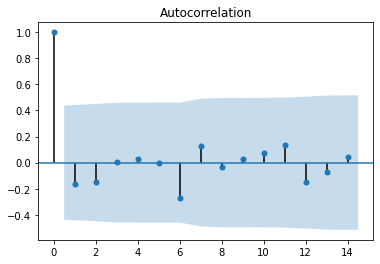

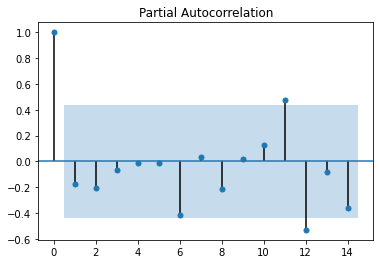

----------------------------------
18


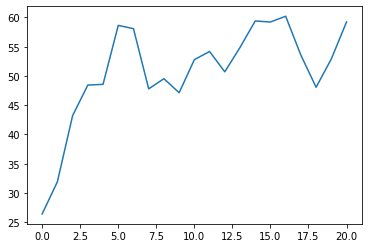

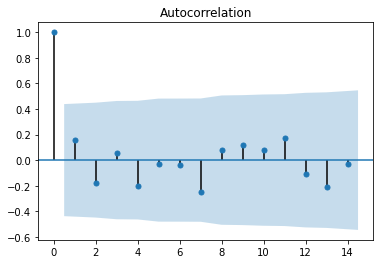

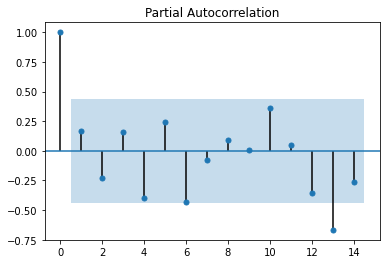

----------------------------------
19


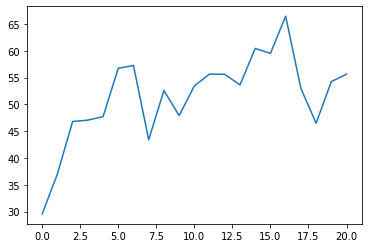

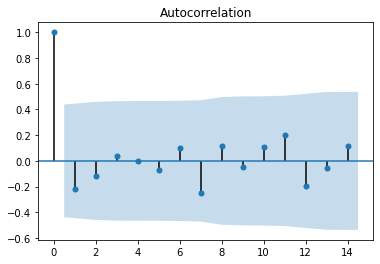

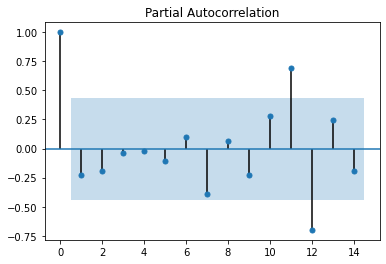

----------------------------------


In [0]:
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf

for i in range(20):
  print(i)
  train_df[str(i)].plot()
  plt.show()
  plt.close()

  plot_acf(train_df[str(i)].diff()[1:]) # diff(): default 1-order difference ; [1:] cuz 1st value is NaN
  plt.show()
  plt.close()
  plot_pacf(train_df[str(i)].diff()[1:])
  plt.show()
  plt.close()
  print("----------------------------------")



In [0]:
import warnings
warnings.filterwarnings("ignore")

datasets=[train_df,dev_df,test_df]
orders=[]
for i in range(2):
  for j in range(2):
    orders.append((i,1,j))

print(orders)

models=[]
for i in range(20):
  print(i)
  for d in datasets:
    best=0
    aic=1000
    for j in range (4):
      try:
        model = ARIMA(d[str(i)],order=orders[j])
        model_fit = model.fit()
        if (model_fit.aic<aic):
          best=j
          aic=model_fit.aic
      except:
        pass
    model=ARIMA(d[str(i)],order=orders[best]).fit()
    models.append(model)




[(0, 1, 0), (0, 1, 1), (1, 1, 0), (1, 1, 1)]
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


"\nmodels=[]\nmodel = ARIMA(train_df['0'],order=(0,1,1)).fit()\nprint(train_df['0'].shape)\nmodels.append(model)\nmodel = ARIMA(train_df['1'],order=(0,1,1)).fit()\nmodels.append(model)\nmodel = ARIMA(train_df['2'],order=(0,1,0)).fit()\nmodels.append(model)\nmodel = ARIMA(train_df['3'],order=(0,1,0)).fit()\nmodels.append(model)\nmodel = ARIMA(train_df['4'],order=(0,1,0)).fit()\nmodels.append(model)\nmodel = ARIMA(train_df['5'],order=(0,1,1)).fit()\nmodels.append(model)\nmodel = ARIMA(train_df['6'],order=(0,1,1)).fit()\nmodels.append(model)\nmodel = ARIMA(train_df['7'],order=(0,1,0)).fit()\nmodels.append(model)\nmodel = ARIMA(train_df['8'],order=(0,1,0)).fit()\nmodels.append(model)\nmodel = ARIMA(train_df['9'],order=(0,1,0)).fit()\nmodels.append(model)\nmodel = ARIMA(train_df['10'],order=(0,1,1)).fit()\nmodels.append(model)\nmodel = ARIMA(train_df['11'],order=(0,1,1)).fit()\nmodels.append(model)\nmodel = ARIMA(train_df['12'],order=(0,1,0)).fit()\nmodels.append(model)\nmodel = ARIMA(train

0


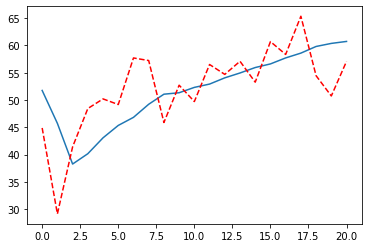

3


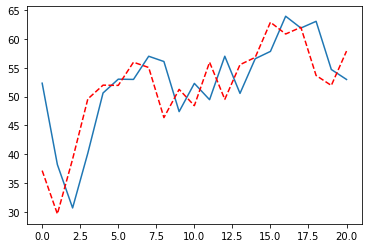

6


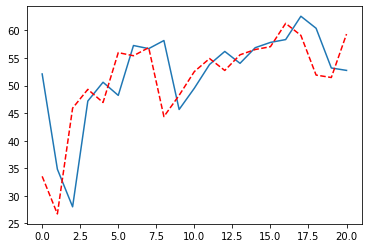

9


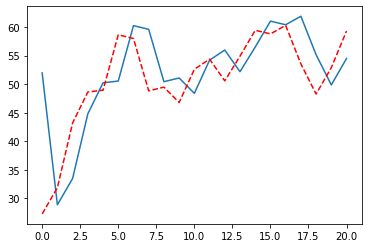

12


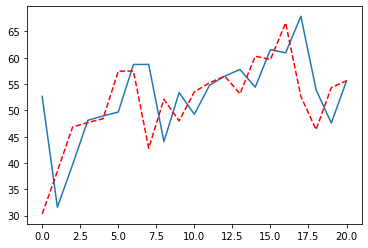

15


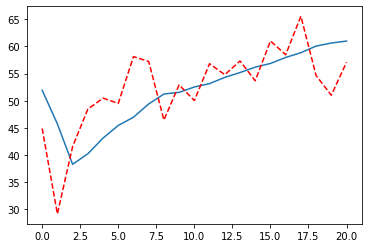

18


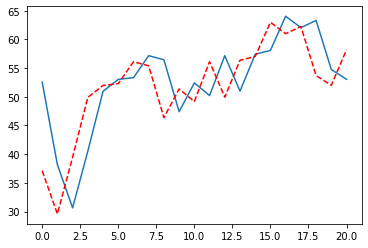

21


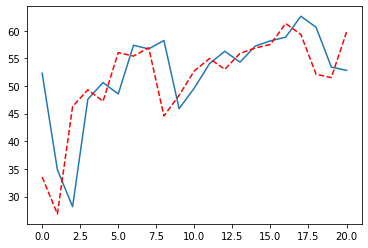

24


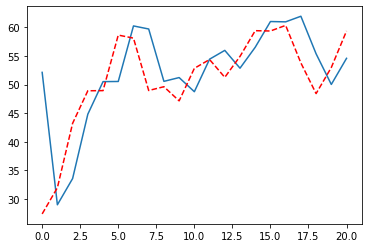

27


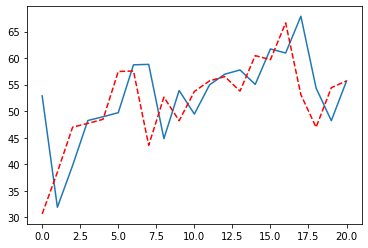

30


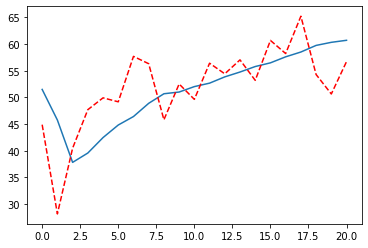

33


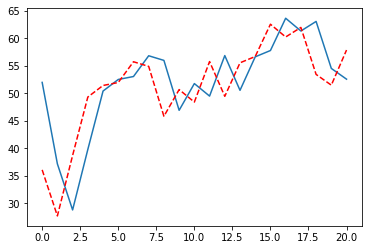

36


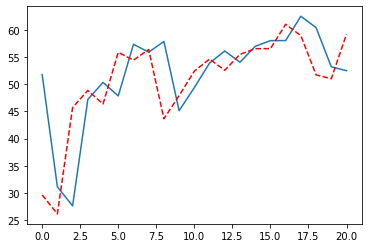

39


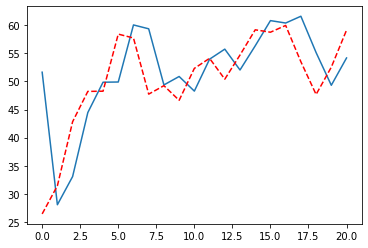

42


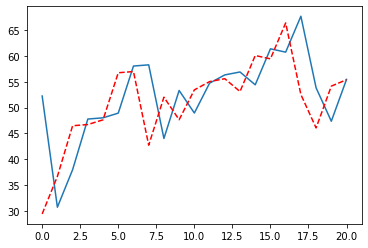

45


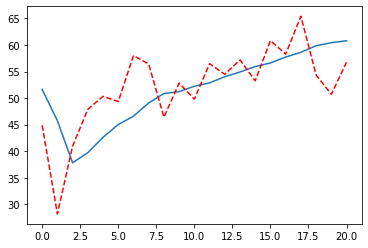

48


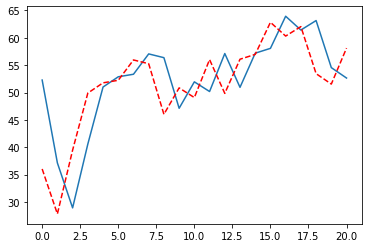

51


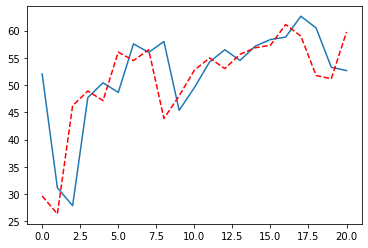

54


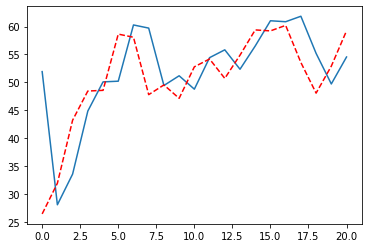

57


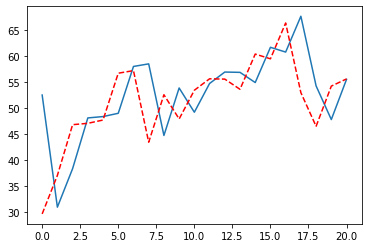

1


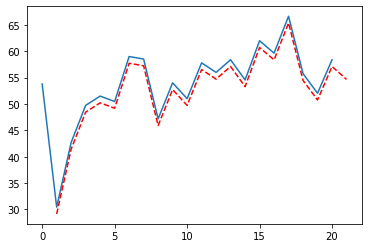

4


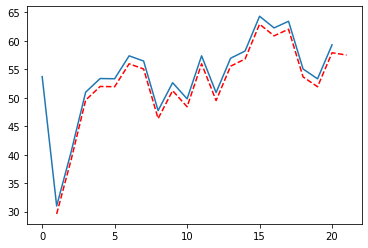

7


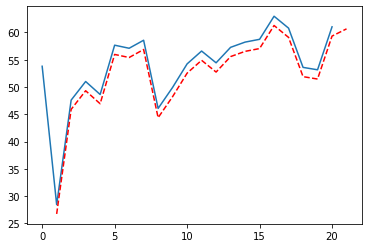

10


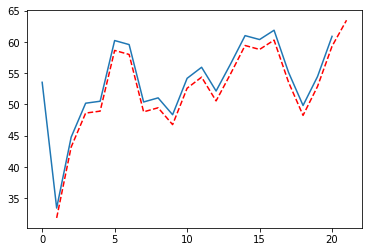

13


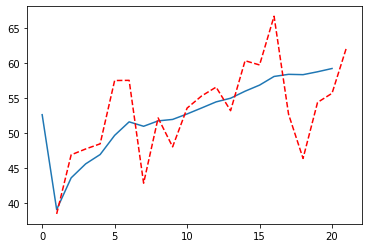

16


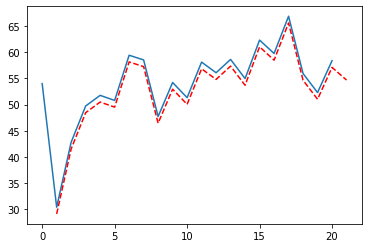

19


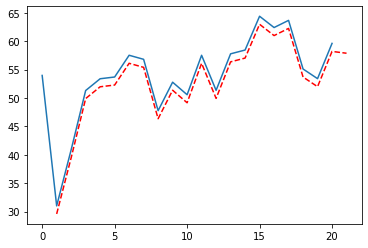

22


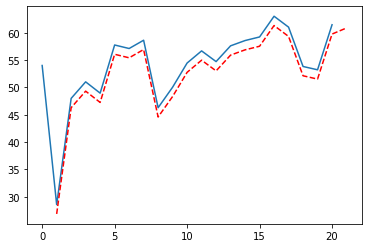

25


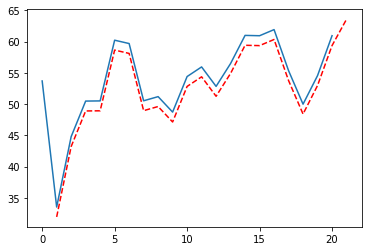

28


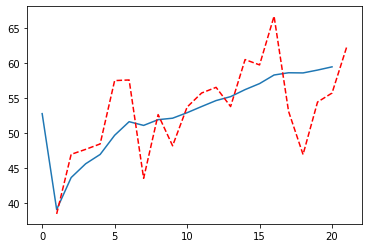

31


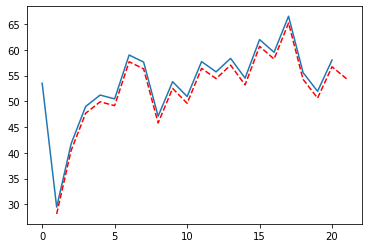

34


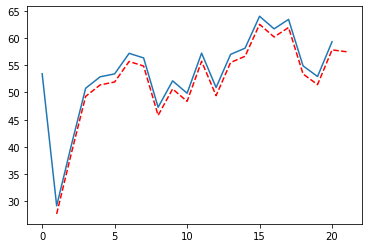

37


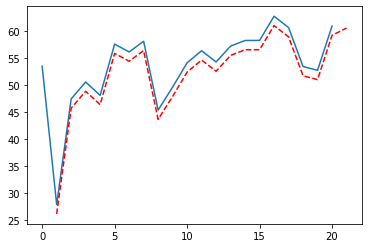

40


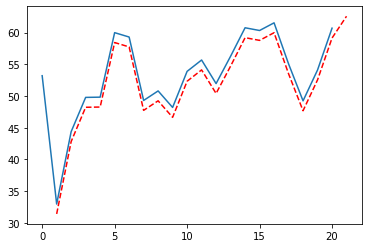

43


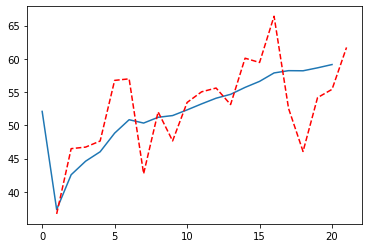

46


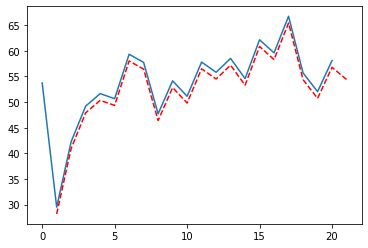

49


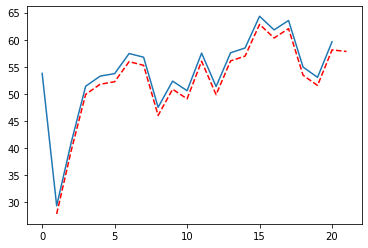

52


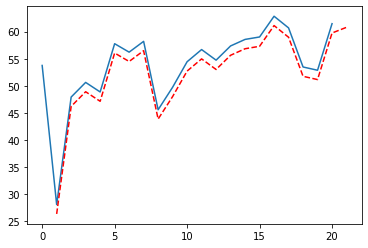

55


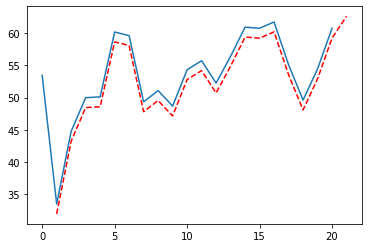

58


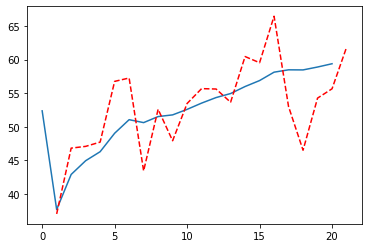

2


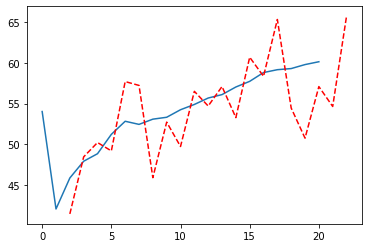

5


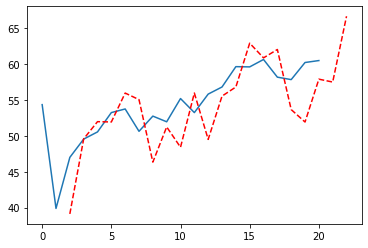

8


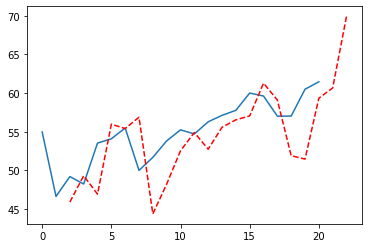

11


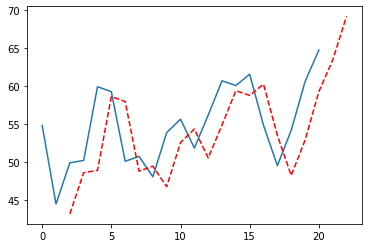

14


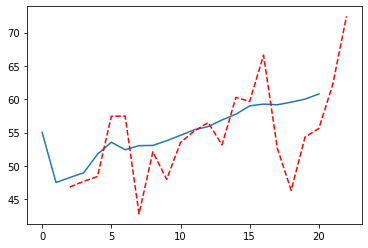

17


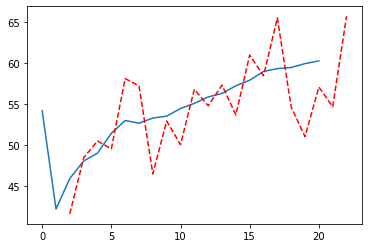

20


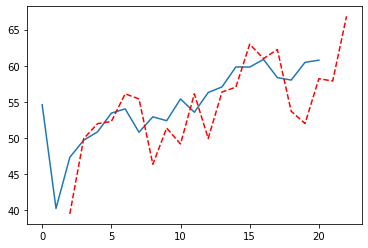

23


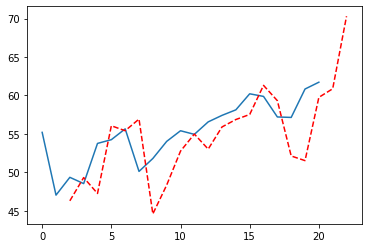

26


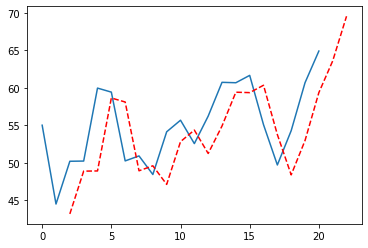

29


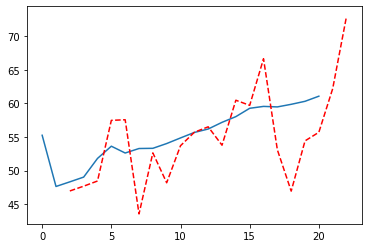

32


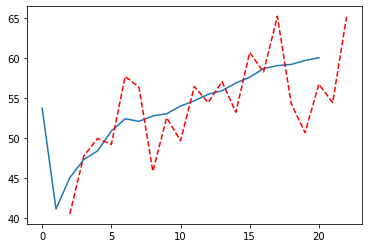

35


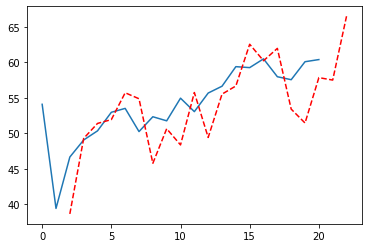

38


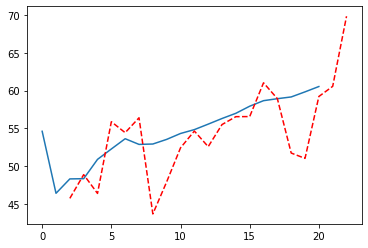

41


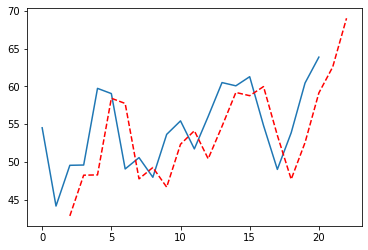

44


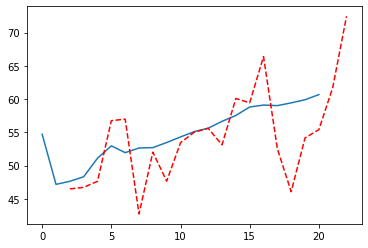

47


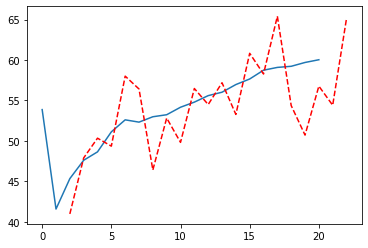

50


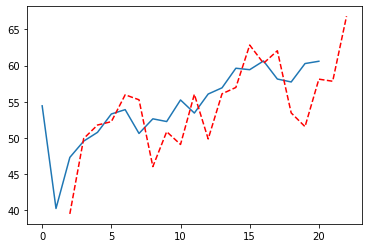

53


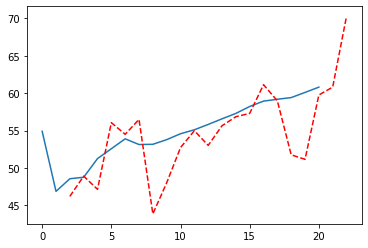

56


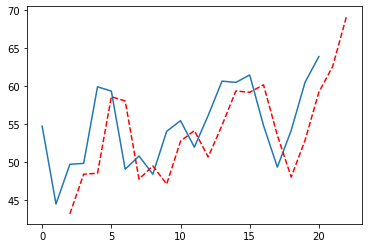

59


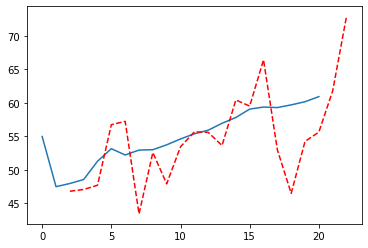

           0          1          2   ...         17        18        19
0   -6.865698 -16.574004   3.144994  ...   6.748141 -5.353759 -9.619986
1  -15.193900  -8.568850   8.488150  ...   0.127150 -9.412850 -2.772850
2  -18.572000  -8.105200  17.889800  ...  -3.473200 -8.488200 -1.731200
3  -24.677550   2.994250   9.716250  ...  -8.332750 -6.886750  3.026250
4  -22.337200   6.829550   7.169550  ... -15.249450 -7.574450  6.730550
5   -7.043876 -16.578197   3.255704  ...   6.712047 -5.427042 -9.612606
6  -15.438200  -8.584100   8.830900  ...   0.207900 -9.612100 -2.757100
7  -18.767450  -7.990850  18.119150  ...  -3.303850 -8.506850 -1.915850
8  -24.753300   2.983400   9.657400  ...  -8.166600 -6.960600  2.969400
9  -22.256800   6.616400   7.225400  ... -14.786600 -7.397600  6.214400
10  -6.612002 -17.609090   2.659366  ...   6.710723 -5.461184 -9.690843
11 -15.915600  -9.470050   9.912950  ...   0.649950 -9.638050 -3.047050
12 -22.119950  -4.978100  18.085900  ...  -3.576100 -8.684100 -2

In [0]:
train_X = []
train_Y = []
dev_X=[]
dev_Y=[]
test_X=[]
test_Y=[]
#from pyramid.arima import ARIMA
for i in range(0,60,3):
  print(i)
 
  predictions = list(models[i].predict(start=1,typ='levels',dynamic=False)) # levels: predict original｜linear: predict differenced
  predictions = [np.mean(predictions)] +predictions # pad the first time step with prediction mean
  plt.plot(predictions)
  plt.plot(train_df[str(i//3)],color='red',linestyle='--')
  plt.show()
  plt.close()
 
  residual=pd.Series(np.array(train_df[str(i//3)])-np.array(predictions))
  train_X.append(residual[:20])
  train_Y.append(residual[20])

for i in range(1,60,3):
  print(i)
  predictions = list(models[i].predict(start=1,typ='levels',dynamic=False)) 
  predictions = [np.mean(predictions)] +predictions 
  plt.plot(predictions)
  plt.plot(dev_df[str(i//3)],color='red',linestyle='--')
  plt.show()
  plt.close()
  
  residual=pd.Series(np.array(dev_df[str(i//3)])-np.array(predictions))
  residual = residual.transpose()
  dev_X.append(residual[:20])
  dev_Y.append(residual[20])  

for i in range(2,60,3):
  print(i)
  predictions = list(models[i].predict(start=1,typ='levels',dynamic=False)) 
  predictions = [np.mean(predictions)] +predictions 
  plt.plot(predictions)
  plt.plot(test_df[str(i//3)],color='red',linestyle='--')
  plt.show()
  plt.close()

  residual=pd.Series(np.array(test_df[str(i//3)])-np.array(predictions))
  residual = residual.transpose()
  test_X.append(residual[:20])
  test_Y.append(residual[20]) 


train_X = pd.concat(train_X,axis=1).transpose()
train_Y = pd.DataFrame(train_Y)
print(train_X)
print(train_Y)

dev_X = pd.concat(dev_X,axis=1).transpose()
dev_Y = pd.DataFrame(dev_Y)
print(dev_X)
print(dev_Y)

test_X = pd.concat(test_X,axis=1).transpose()
test_Y = pd.DataFrame(test_Y)
print(test_X)
print(test_Y)




#LSTM Model



In [0]:

from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, Activation
from keras import backend as K
from keras.utils.generic_utils import get_custom_objects
from keras.callbacks import ModelCheckpoint
from keras.regularizers import l1_l2



from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [0]:
# data sampling
STEP = 20


_train_X = np.asarray(train_X).reshape(20, 20, 1)
_dev_X = np.asarray(dev_X).reshape((20, 20, 1))
_test_X = np.asarray(test_X).reshape(20, 20, 1)

_train_Y = np.asarray(train_Y).reshape(20, 1)
_dev_Y = np.asarray(dev_Y).reshape(20, 1)
_test_Y = np.asarray(test_Y).reshape(20, 1)


In [0]:
#define custom activation
class Double_Tanh(Activation):
    def __init__(self, activation, **kwargs):
        super(Double_Tanh, self).__init__(activation, **kwargs)
        self.__name__ = 'double_tanh'

def double_tanh(x):
    return (K.tanh(x) * 2)

get_custom_objects().update({'double_tanh':Double_Tanh(double_tanh)})

In [0]:
print (_train_X)
print (_train_Y)

[[[-6.86569809e+00]
  [-1.65740039e+01]
  [ 3.14499414e+00]
  [ 8.26865885e+00]
  [ 7.12249023e+00]
  [ 3.82498828e+00]
  [ 1.08704863e+01]
  [ 8.00155580e+00]
  [-5.17964258e+00]
  [ 1.37986935e+00]
  [-2.59412149e+00]
  [ 3.58270383e+00]
  [ 6.34141272e-01]
  [ 2.14035727e+00]
  [-2.67752930e+00]
  [ 4.08396875e+00]
  [ 6.38716792e-01]
  [ 6.74814131e+00]
  [-5.35375934e+00]
  [-9.61998644e+00]]

 [[-1.51939000e+01]
  [-8.56884999e+00]
  [ 8.48815001e+00]
  [ 9.42015001e+00]
  [ 1.36015001e+00]
  [-1.08184999e+00]
  [ 2.98915001e+00]
  [-1.95384999e+00]
  [-9.74784999e+00]
  [ 3.86615001e+00]
  [-3.87184999e+00]
  [ 6.51615001e+00]
  [-7.49784999e+00]
  [ 4.99215001e+00]
  [ 2.30150008e-01]
  [ 5.07215001e+00]
  [-3.08784999e+00]
  [ 1.27150008e-01]
  [-9.41284999e+00]
  [-2.77284999e+00]]

 [[-1.85720000e+01]
  [-8.10520000e+00]
  [ 1.78898000e+01]
  [ 2.12080000e+00]
  [-3.67320000e+00]
  [ 7.75480000e+00]
  [-1.85420000e+00]
  [ 1.78800000e-01]
  [-1.37962000e+01]
  [ 2.56980000e+

In [0]:
model = Sequential()
#check https://machinelearningmastery.com/use-weight-regularization-lstm-networks-time-series-forecasting/
model.add(LSTM(33, input_shape=(20,1), dropout=0.0, kernel_regularizer=l1_l2(0.00,0.00), bias_regularizer=l1_l2(0.00,0.00)))
model.add(Dense(1))
model.add(Activation(double_tanh))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse', 'mae'])

print(model.metrics_names)


['loss', 'mse', 'mae']


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
print(_train_X.shape)
print(_train_Y.shape)


(20, 20, 1)
(20, 1)


In [0]:
model_scores = {}
Reg = False
d = 'hybrid_LSTM'

if Reg :
    d += '_with_reg'

epoch_num=1
for _ in range(124):
   
    dir = 'gdrive/My Drive/AI Project/models/'+d
    file_list = os.listdir(dir)
    print(file_list)
    if len(file_list) != 0 :
        epoch_num = len(file_list) + 1
        recent_model_name = '/epoch'+str(epoch_num-1)+'.h5'
        filepath = dir + recent_model_name
        model = load_model(filepath)

    filepath = dir + '/epoch'+str(epoch_num)+'.h5'

    checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=False, mode='min')
    callbacks_list = [checkpoint]
    if len(callbacks_list) == 0:
        model.fit(_train_X, _train_Y, epochs=1, batch_size=1, shuffle=True)
    else:
        model.fit(_train_X, _train_Y, epochs=1, batch_size=1, shuffle=True, callbacks=callbacks_list)
    
    
    score_train = model.evaluate(_train_X, _train_Y)
    score_dev = model.evaluate(_dev_X, _dev_Y)
    score_test = model.evaluate(_test_X, _test_Y)
    
    print('train set score : mse - ' + str(score_train[1]) +' / mae - ' + str(score_train[2]))
    print('dev set score : mse - ' + str(score_dev[1]) +' / mae - ' + str(score_dev[2]))
    print('test set score : mse - ' + str(score_test[1]) +' / mae - ' + str(score_test[2]))

    # get former score data
    df = pd.read_csv(dir+".csv")
    train_mse = list(df['TRAIN_MSE'])
    dev_mse = list(df['DEV_MSE'])
    test_mse = list(df['TEST_MSE'])

    train_mae = list(df['TRAIN_MAE'])
    dev_mae = list(df['DEV_MAE'])
    test_mae = list(df['TEST_MAE'])

    # append new data
    train_mse.append(score_train[1])
    dev_mse.append(score_dev[1])
    test_mse.append(score_test[1])

    train_mae.append(score_train[2])
    dev_mae.append(score_dev[2])
    test_mae.append(score_test[2])

    # organize newly created score dataset
    model_scores['TRAIN_MSE'] = train_mse
    model_scores['DEV_MSE'] = dev_mse
    model_scores['TEST_MSE'] = test_mse

    model_scores['TRAIN_MAE'] = train_mae
    model_scores['DEV_MAE'] = dev_mae
    model_scores['TEST_MAE'] = test_mae

    model_scores_df = pd.DataFrame(model_scores)
    model_scores_df.to_csv(dir+".csv")



[]
Epoch 1/1
20/20 [==============================] - 1s 36ms/step - loss: 9.0557 - mse: 9.0557 - mae: 2.5679

Epoch 00001: saving model to gdrive/My Drive/AI Project/models/hybrid_LSTM/epoch1.h5
20/20 [==============================] - 0s 184us/step
train set score : mse - 9.054204940795898 / mae - 2.5591397285461426
dev set score : mse - 11.608283996582031 / mae - 3.035560131072998
test set score : mse - 53.79088592529297 / mae - 6.968447685241699
['epoch1.h5']
Epoch 1/1
20/20 [==============================] - 1s 47ms/step - loss: 9.0555 - mse: 9.0555 - mae: 2.5686

Epoch 00001: saving model to gdrive/My Drive/AI Project/models/hybrid_LSTM/epoch2.h5
20/20 [==============================] - 0s 187us/step
train set score : mse - 9.05502986907959 / mae - 2.5646846294403076
dev set score : mse - 11.88702392578125 / mae - 3.0714797973632812
test set score : mse - 53.68292999267578 / mae - 6.96155309677124
['epoch1.h5', 'epoch2.h5']
Epoch 1/1
20/20 [==============================] - 1s 47

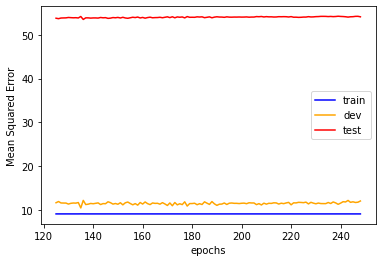

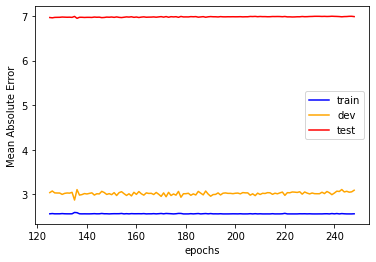

In [0]:
performance = pd.read_csv(dir+'.csv')

mse=['TRAIN_MSE','DEV_MSE','TEST_MSE']
mae = ['TRAIN_MAE','DEV_MAE','TEST_MAE']

plt.plot(performance[mse[0]][124:],color='blue',label='train')
plt.plot(performance[mse[1]][124:],color='orange',label='dev')
plt.plot(performance[mse[2]][124:],color='red',label='test')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('Mean Squared Error')
plt.show()
plt.close()

plt.plot(performance[mae[0]][124:],color='blue',label='train')
plt.plot(performance[mae[1]][124:],color='orange',label='dev')
plt.plot(performance[mae[2]][124:],color='red',label='test')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('Mean Absolute Error')
plt.show()
plt.close()

[-1.9913719]
[-12.58774635   6.40714415   4.35971621   1.2686216    8.86961034
   6.01483233  -6.93349565   0.27614798  -3.35922637   3.19016522
   0.45629277   2.20495575  -2.40864648   4.59477825   1.31172379
   7.60641964  -4.36083775  -8.41717354  -2.21640826  -5.15061093]
[5.59306403]
[-12.587746346062254, 6.407144148814261, 4.359716209885107, 1.2686216019051884, 8.869610341001056, 6.0148323329983455, -6.933495650196349, 0.27614798442550637, -3.359226369842858, 3.19016522383761, 0.45629277456945516, 2.2049557499713686, -2.4086464782206463, 4.594778246049437, 1.311723788863688, 7.606419635820053, -4.360837749359732, -8.417173544989794, -2.216408257585222, -5.150610934774711, 5.593064025583018]


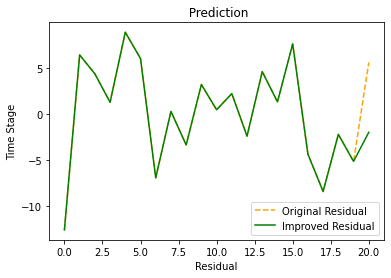

In [0]:
model = load_model(dir+'/epoch124.h5')


predictions = model.predict(_test_X)
print(predictions[0,0:].ravel())
print(_test_X[0,0:].ravel())
print(_test_Y[0,0:].ravel())
graph=list(_test_X[0,0:].ravel())+list(_test_Y[0,0:].ravel())
print(graph)
graph_improve=list(_test_X[0,0:].ravel())+list(predictions[0,0:].ravel())

plt.plot(graph, color = 'Orange', label = 'Original Residual',linestyle='--')
plt.plot(graph_improve, color = 'green', label = 'Improved Residual')
plt.title(' Prediction')
plt.xlabel('Residual')
plt.ylabel('Time Stage')
plt.legend()
plt.show()


##Conclusion 
What we have done in our interim prototype is to construct an ARIMA model as well as a LSTM model. In the next step, we'll try to connect the two as a hybrid model by utilizing the residuals in ARIMA model for LSTM model to predict as shown in this paper "Time series forcasting using a hybrid ARIMA and LSTM model" by Fathi (2019). 

## Reference 
https://blog.usejournal.com/stock-market-prediction-by-recurrent-neural-network-on-lstm-model-56de700bff68

https://github.com/TannerGilbert/Tutorials/blob/master/Keras-Tutorials/5.%20Stock%20Price%20Prediction%20using%20a%20Recurrent%20Neural%20Network/Stock%20Price%20Prediction.ipynb

##Link to Google Colab Notebook:
https://colab.research.google.com/drive/1TRdTb6092fzuv7bpFpL7whg8WPOuanww


##Link YouTube Video
https://youtu.be/TSEUPRg0bnM

